In [1]:
# 1. 使用 torchvision 加载并预处理 CIFAR-10
# 2. 定义网络
# 3. 定义损失函数和优化器
# 4. 训练网络并更新网络参数
# 5. 测试网络

In [1]:
import torch as t
t.__version__

'0.2.0_3'

In [7]:
#1. 使用 torchvision 加载并预处理 CIFAR-10
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch as t
show = ToPILImage() # 可以把 Tensor 转成 Image，方便可视化

In [8]:
#第一次运行程序 torchvision 会自动下载 CIFAR-10 数据集
#大约 100MB， 需要发费一定的时间
#如果已经下载有 CIFAR-10 ， 可通过 root 参数指定

#定义对数据的处理
transform = transforms.Compose([
    transforms.ToTensor(), # 转为 Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #归一化
                        ])

#训练集
trainset = tv.datasets.CIFAR10(
                    root = '/home/mzl/Public_Data/',
                    train = True,
                    download = False,
                    transform = transform)

In [10]:
trainloader = t.utils.data.DataLoader(
                    trainset,
                    batch_size = 4,
                    shuffle = True,
                    num_workers = 2)
#测试集
testset = tv.datasets.CIFAR10(
                    '/home/mzl/Public_Data/',
                    train = False,
                    download = False,
                    transform = transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size = 4,
                    shuffle = False,
                    num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


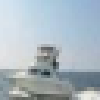

In [11]:
(data, label) = trainset[100]
classes[label]
show((data + 1) / 2).resize((100, 100))

        dog              dog              dog              car


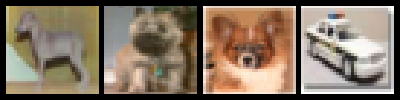

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回 4 张图片及标签，如下图
print('      '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images + 1) / 2)).resize((400, 100))

In [17]:
# 2. 定义网络
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16 * 5 * 5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [18]:
# 3.定义损失函数和优化器
from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [15]:
# 4.训练网络
# 所有网络的训练流程都是相似的，不断地执行如下流程
# 输入数据
# 前向传播 + 反向传播
# 更新参数

In [19]:
from torch.autograd import Variable
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 输入数据
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        #梯度清零
        optimizer.zero_grad()
        
        #forward + backward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        

        #更新参数
        optimizer.step()
        
        #打印 log 信息
        running_loss += loss.data[0]
        if i % 2000 == 1999: # 每 2000 个 batch 打印一次训练状态
            print('66','[%d, %5d] loss: %.3f' \
                  % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('66', 'Finished Training')

66 [1,  2000] loss: 2.159
66 [1,  4000] loss: 1.862
66 [1,  6000] loss: 1.709
66 [1,  8000] loss: 1.568
66 [1, 10000] loss: 1.493
66 [1, 12000] loss: 1.442
66 [2,  2000] loss: 1.368
66 [2,  4000] loss: 1.339
66 [2,  6000] loss: 1.317
66 [2,  8000] loss: 1.302
66 [2, 10000] loss: 1.277
66 [2, 12000] loss: 1.254
66 Finished Training


66 实际的 label:       cat     ship     ship    plane


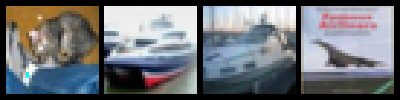

In [20]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个 batch 返回 4 张图片， 如果 2-10 所示
print('66','实际的 label: ', ' '.join(\
                '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400, 100))

In [21]:
# 计算图片在每个类别上的分数
outputs = net(Variable(images))
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('66','预测结果:',' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

66 预测结果:   cat   car   car  ship


In [22]:
#在测试集上的效果
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('66','10000张测试集中的准确率为: %d %%' % (100 * correct / total))

66 10000张测试集中的准确率为: 57 %
